In [1]:
%matplotlib inline
import signac
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path
from itertools import product
import pandas as pd
import json

sns.set(context="notebook", style="whitegrid",font_scale=1.2,palette='viridis')


In [2]:
base = './'
fn_projects = {
    'm0':base+'model_0',
}

In [3]:
base = '../scripts/'
fn_projects = {
    'm':base+'model',
}

In [4]:
names = [
    'qm9',
    'molecular_crystals',
    'silicon_bulk',
    'methane_liquid',
    'methane_sulfonic'
]
radial_basis = ['GTO','DVR','GTO Spline','DVR Spline']
grads = [True, False]

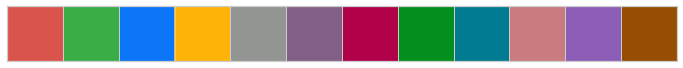

In [5]:
colors = ["pale red","medium green",
          "deep sky blue", "amber", "grey",  "dusty purple",
          "raspberry","emerald green","ocean","dirty pink",
         "deep lavender","warm brown"]
palette = sns.xkcd_palette(colors)
sns.palplot(palette)

In [34]:
project = signac.get_project(fn_projects['m'])
ii =0 
for job in project.find_jobs():
    if 'benchmark' in job.document:
    # print(job.document)
        for p in job.document.benchmark:
            if p['mean'] < 4*p['stdev']:
                # print(job.sp.name,job.sp.representation.compute_gradients, job.sp.representation.optimization_args , job.sp.representation.radial_basis, job.document.elapsed_mean ,job.document.elapsed_std)

                # data = fromjson(job.fn('in_ri_cpp.json'))
                print(p)
                ii += 1

{'tag': 'pred energy', 'mean': 0.012177924392744899, 'stdev': 0.0037005160740878154, 'min': 0.004795033019036055, 'max': 0.014467440079897642, 'samples': [0.01367178582586348, 0.014049289980903268, 0.013906073058024049, 0.004795033019036055, 0.014467440079897642], 'name': 'methane_liquid', 'n_atoms': 3645}
{'tag': 'NL', 'mean': 0.03189020198769867, 'stdev': 0.011908465314287778, 'min': 0.018769515911117196, 'max': 0.046982693020254374, 'samples': [0.02981878793798387, 0.04428557911887765, 0.018769515911117196, 0.046982693020254374, 0.01959443395026028], 'name': 'silicon_bulk', 'n_atoms': 1458}
{'tag': 'pred energy', 'mean': 0.008219619933515786, 'stdev': 0.003911098884804697, 'min': 0.003342958865687251, 'max': 0.01175504899583757, 'samples': [0.003532694885507226, 0.011415062006562948, 0.011052334913983941, 0.01175504899583757, 0.003342958865687251], 'name': 'silicon_bulk', 'n_atoms': 1458}
{'tag': 'NL', 'mean': 0.025908862659707665, 'stdev': 0.009909781517124135, 'min': 0.01675411709

In [45]:
project = signac.get_project(fn_projects['m0'])
ii =0 
for job in project.find_jobs():
    if 'benchmark' in job.document:
        print(job.document.benchmark[1]['mean'], job.sp.feature_subselection.Nselect, job)
        

11.392430127272382 650 e827aa8471066c8f5bf02a517f2c9acb
11.387938661302906 130 7383cbdf0e358439c4fe8fe618c419d1
11.414933870499954 130 ff424cfc25b9d7403e86ff12c16fb061
11.374848789954559 None 2def41792d927293e36647b1a05455bc
11.058659830357646 909 48f28745e93a42f05511c98b147ac68c
11.070267244655406 650 ba4ee5e804e1bcd01b9652ac29ed4c7f
11.436012196767843 909 13488703b65c5df176171c90efe1fa17
11.405691038025543 13 4a9772d7222cb7fb0c974ac6459cb349
11.037588930444326 None 84af218cbf7c8eb9383ad0210dffefcf
11.264136715074224 1300 d3e44ec0d85561834acf86843a163a1a
11.46268724615996 None c1fa5e11f4156c5a4345153e73aa2493
11.49084889573666 65 20119556eaa082865a6f5dbeb2de6082
10.960506925918162 13 1df9191559d502c261088ae9f57cc67a
11.131725703741541 909 cd5da7daad25c5ac22a0e7a4aa2eeac2
11.427683744992828 260 2201e5c655ae1befc1ae3ac29f80345c
11.457581187176402 909 a25913744391df99000c5383845f6ad1
11.088350520392414 65 7b6b7445592f9ed922ae600467432fba
11.086292994851247 13 3fbab756837748ebe051dd41d251

# m0

{'Nselect': {'14': 5000}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 100}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 9000}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 200}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 2000}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 500}, 'act_on': 'sample per species', 'seed': 10}
{'Nselect': {'14': 1000}, 'act_on': 'sample per species', 'seed': 10}


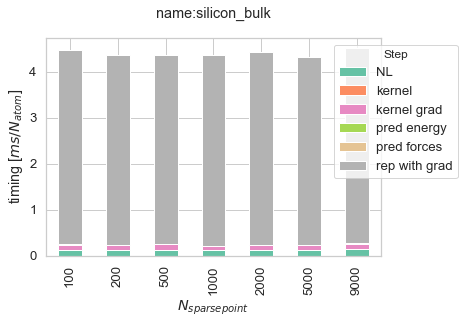

In [39]:
project = signac.get_project(fn_projects['m0'])
qry = {'feature_subselection.Nselect':{'$eq':None}, 'representation.normalize':{'$eq':False}}
aa = []
n_atoms = 2700
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{sparse point}$'] = job.sp.sparse_point_subselection.Nselect['14']
        v['mean [ms/atom]'] = v['mean'] / n_atoms * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='$N_{sparse point}$', columns='tag', values='mean [ms/atom]')

df2.plot(kind='bar', stacked=True, colormap="Set2")
title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
plt.title(title,pad=20)
plt.ylabel('timing [$ms/N_{atom}$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

{'Nselect': 650, 'act_on': 'feature', 'seed': 10}
{'Nselect': 130, 'act_on': 'feature', 'seed': 10}
{'Nselect': 13, 'act_on': 'feature', 'seed': 10}
{'Nselect': None, 'act_on': 'feature', 'seed': 10}
{'Nselect': 260, 'act_on': 'feature', 'seed': 10}
{'Nselect': 909, 'act_on': 'feature', 'seed': 10}
{'Nselect': 65, 'act_on': 'feature', 'seed': 10}
{'Nselect': 1300, 'act_on': 'feature', 'seed': 10}


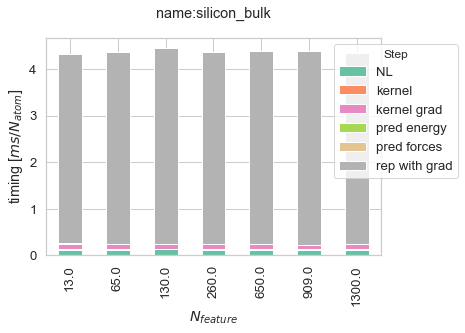

In [42]:
project = signac.get_project(fn_projects['m0'])
qry = {'sparse_point_subselection.Nselect':{'14':9000}, 'representation.normalize':{'$eq':False}}
aa = []
n_atoms = 2700
for job in project.find_jobs(qry):
    print(job.sp.feature_subselection)
    ee = job.document.benchmark
    for v in ee:
        v['$N_{feature}$'] = job.sp.feature_subselection.Nselect
        v['mean [ms/atom]'] = v['mean'] / n_atoms * 1000
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='$N_{feature}$', columns='tag', values='mean [ms/atom]')

df2.plot(kind='bar', stacked=True, colormap="Set2")
title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
plt.title(title,pad=20)
plt.ylabel('timing [$ms/N_{atom}$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [55]:
df

""


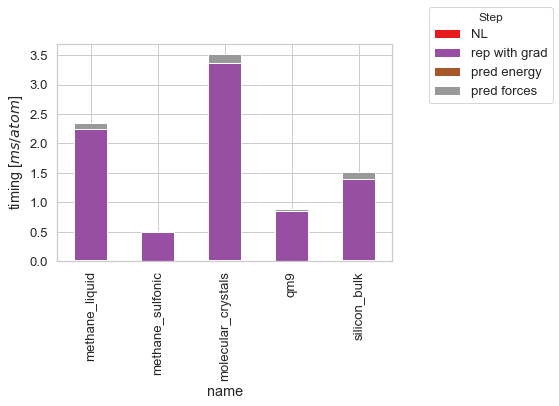

In [29]:
project = signac.get_project(fn_projects['m'])
qry = {}
aa = []
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        # v['$N_{sparse point}$'] = job.sp.sparse_point_subselection.Nselect['14']
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='name', columns='tag', values='mean [ms/atom]')
df2 = df2[['NL','rep with grad', 'pred energy', 'pred forces']]
df2.plot(kind='bar', stacked=True, colormap='Set1')
# df2.plot(kind='bar', stacked=True, colormap='Set2')
# title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
# plt.title(title,pad=20)
plt.ylabel('timing [$ms/atom$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1.2))
plt.show()

In [31]:
df

,tag,mean,stdev,min,max,samples,name,n_atoms,mean [ms/atom],std [ms/atom]
0,NL,0.030295,0.007503,0.026039,0.045268,"[0.04526832397095859, 0.027476116083562374, 0....",methane_sulfonic,7371,0.004110,0.000509
1,rep with grad,3.586335,0.004367,3.581278,3.592200,"[3.592199904844165, 3.590311781037599, 3.58595...",methane_sulfonic,7371,0.486547,0.000296
2,pred energy,0.014127,0.003205,0.007867,0.016824,"[0.01593140698969364, 0.014805778861045837, 0....",methane_sulfonic,7371,0.001917,0.000217
3,pred forces,0.166740,0.001369,0.164954,0.168651,"[0.16495355498045683, 0.1664204818662256, 0.16...",methane_sulfonic,7371,0.022621,0.000093
4,NL,0.025909,0.009910,0.016754,0.043692,"[0.02829388715326786, 0.023910989984869957, 0....",molecular_crystals,1408,0.018401,0.003519
5,rep with grad,4.713388,0.055042,4.652424,4.790574,"[4.652424187166616, 4.7670378889888525, 4.6872...",molecular_crystals,1408,3.347577,0.019546
6,pred energy,0.004488,0.001154,0.002200,0.005353,"[0.004978286102414131, 0.002200069837272167, 0...",molecular_crystals,1408,0.003187,0.000410
7,pred forces,0.204184,0.007742,0.189233,0.211397,"[0.2051214079838246, 0.20727997599169612, 0.21...",molecular_crystals,1408,0.145017,0.002749
8,NL,0.031890,0.011908,0.018770,0.046983,"[0.02981878793798387, 0.04428557911887765, 0.0...",silicon_bulk,1458,0.021873,0.004084
9,rep with grad,1.994908,0.010778,1.984874,2.012771,"[2.0014293321873993, 2.012770886067301, 1.9848...",silicon_bulk,1458,1.368250,0.003696


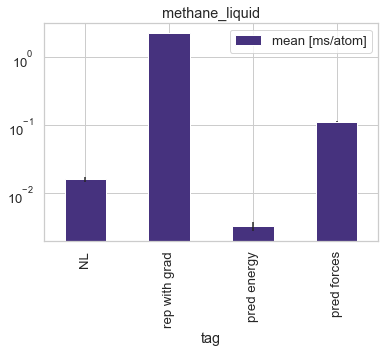

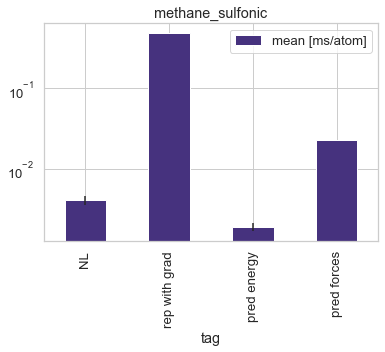

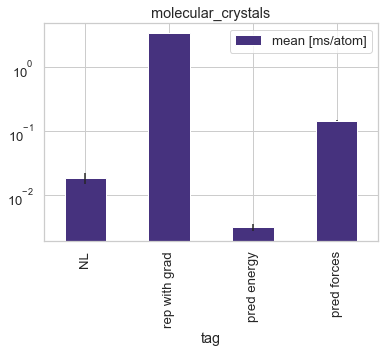

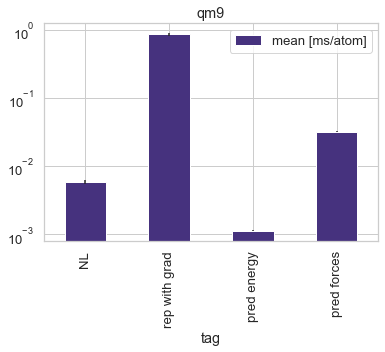

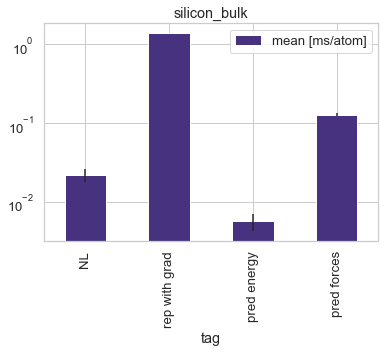

In [32]:
for name,d in df.groupby('name'):
    d.plot(kind='bar', x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name, logy=True)

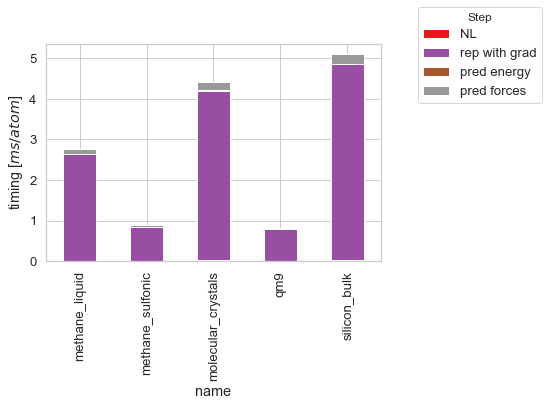

In [28]:
project = signac.get_project(fn_projects['m'])
qry = {}
aa = []
for job in project.find_jobs(qry):
    # print(job.sp.sparse_point_subselection)
    ee = job.document.benchmark
    for v in ee:
        # v['$N_{sparse point}$'] = job.sp.sparse_point_subselection.Nselect['14']
        v['mean [ms/atom]'] = v['mean'] / v['n_atoms'] * 1000
        # divide by 2 because yerr input is for the upper/lower error bar respectively
        v['std [ms/atom]'] = v['stdev'] / v['n_atoms'] * 1000 / 2
    aa.extend(ee)
df = pd.DataFrame(aa)

title_values = ['name']

df2 = df.pivot_table(index='name', columns='tag', values='mean [ms/atom]')
df2 = df2[['NL','rep with grad', 'pred energy', 'pred forces']]
df2.plot(kind='bar', stacked=True, colormap='Set1')
# df2.plot(kind='bar', stacked=True, colormap='Set2')
# title = ' / '.join([k+':'+str(df.iloc[0][k]) for k in title_values])
# plt.title(title,pad=20)
plt.ylabel('timing [$ms/atom$]')
plt.legend(title='Step',loc='upper right', bbox_to_anchor=(1.5, 1.2))
plt.show()

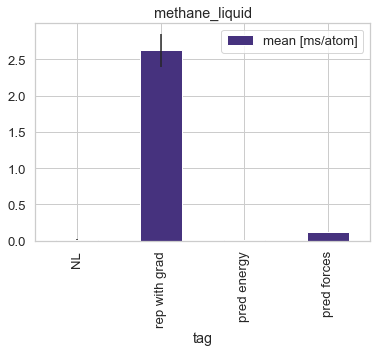

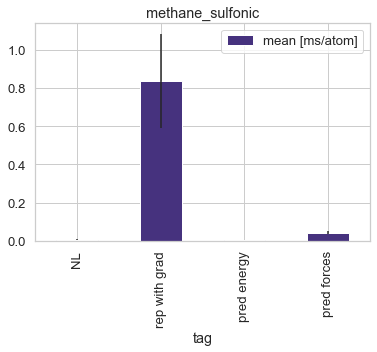

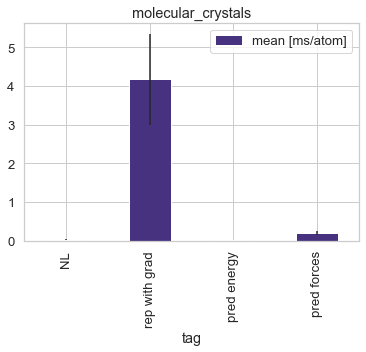

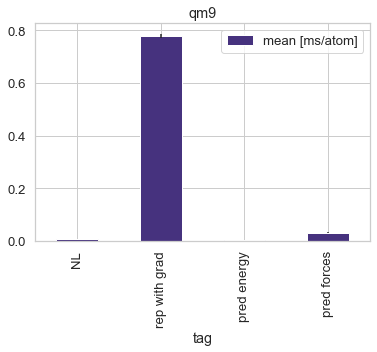

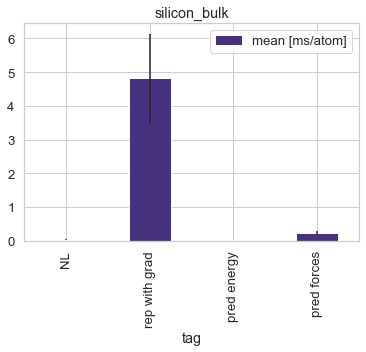

In [27]:
for name,d in df.groupby('name'):
    d.plot(kind='bar', x='tag', y='mean [ms/atom]', yerr='std [ms/atom]',title=name, logy=False)